# Goal of the Competition
The goal of this competition is to assess the language proficiency of 8th-12th grade English Language Learners (ELLs). Utilizing a dataset of essays written by ELLs will help to develop proficiency models that better supports all students.

Your work will help ELLs receive more accurate feedback on their language development and expedite the grading cycle for teachers. These outcomes could enable ELLs to receive more appropriate learning tasks that will help them improve their English language proficiency.

# Context
Writing is a foundational skill. Sadly, it's one few students are able to hone, often because writing tasks are infrequently assigned in school. A rapidly growing student population, students learning English as a second language, known as English Language Learners (ELLs), are especially affected by the lack of practice. While automated feedback tools make it easier for teachers to assign more writing tasks, they are not designed with ELLs in mind.

Existing tools are unable to provide feedback based on the language proficiency of the student, resulting in a final evaluation that may be skewed against the learner. Data science may be able to improve automated feedback tools to better support the unique needs of these learners.

Competition host Vanderbilt University is a private research university in Nashville, Tennessee. It offers 70 undergraduate majors and a full range of graduate and professional degrees across 10 schools and colleges, all on a beautiful campus—an accredited arboretum—complete with athletic facilities and state-of-the-art laboratories. Vanderbilt is optimized to inspire and nurture cross-disciplinary research that fosters discoveries that have global impact. Vanderbilt and co-host, The Learning Agency Lab, an independent nonprofit based in Arizona, are focused on developing science of learning-based tools and programs for social good.

Vanderbilt and The Learning Agency Lab have partnered together to offer data scientists the opportunity to support ELLs using data science skills in machine learning, natural language processing, and educational data analytics. You can improve automated feedback tools for ELLs by sensitizing them to language proficiency. The resulting tools could serve teachers by alleviating the grading burden and support ELLs by ensuring their work is evaluated within the context of their current language level.

# Acknowledgments
Vanderbilt University and the Learning Agency Lab would like to thank the Bill & Melinda Gates Foundation, Schmidt Futures, and Chan Zuckerberg Initiative for their support in making this work possible.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import *
from scipy import sparse
from wordcloud import *
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.ensemble import *
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **Step1**: Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

In [2]:
df_train=pd.read_csv("datasets/train.csv")
df_test=pd.read_csv('datasets/test.csv')
df_sample=pd.read_csv('datasets/sample_submission.csv')
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [4]:
df_train.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [5]:
df_train.duplicated().sum()

0

In [6]:
features=['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
df_train['Total']=df_train.iloc[:,2:].sum(axis=1)
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,Total
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5


### **Step2**: Prepare
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


(-0.5, 799.5, 599.5, -0.5)

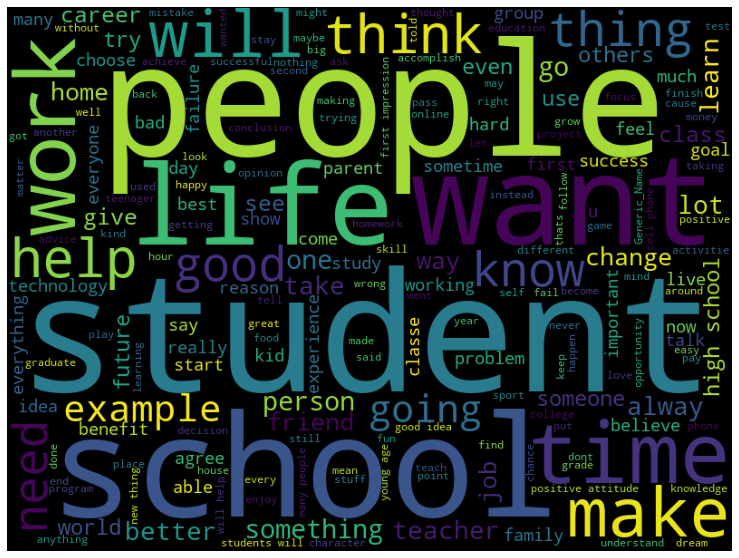

In [7]:
cloud = WordCloud(width=800,
                  height=600,
                  ).generate(" ".join(df_train['full_text']))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off') 

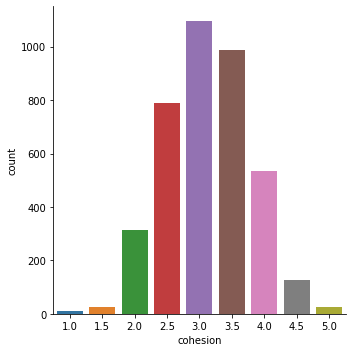

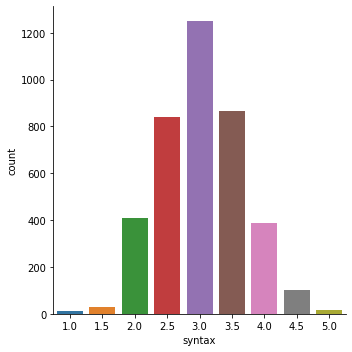

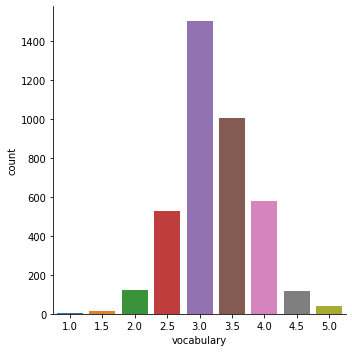

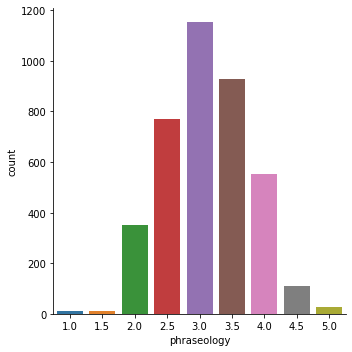

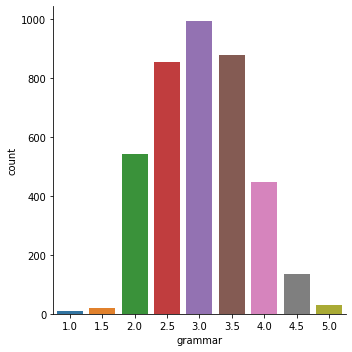

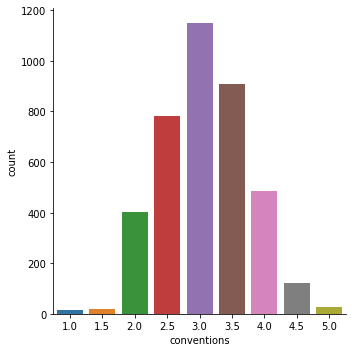

In [8]:
for i in range(len(features)):sns.catplot(features[i],data=df_train,kind='count')

<AxesSubplot:>

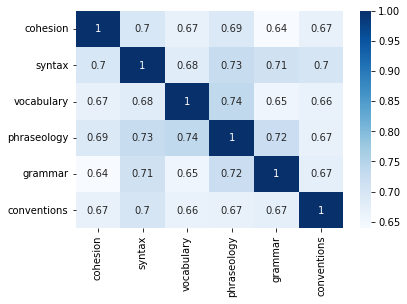

In [9]:
feat_corr=df_train[features].corr()
sns.heatmap(feat_corr,annot=True,cbar=True,cmap='Blues')

### **Step3**: Analyze
<pre><b> • Feature selection<b> </pre>
<pre><b> • Model selection<b> </pre>
<pre><b> • Analyze data<b> </pre>

In [10]:
def mcrmse(targets, predictions):
    error = targets - predictions
    squared_error = np.square(error)
    colwise_mse = np.mean(squared_error, axis=0)
    root_colwise_mse = np.sqrt(colwise_mse)
    return np.mean(root_colwise_mse, axis=0)

In [11]:
df_train['Len_Text']=df_train['full_text'].apply(lambda x:len(x))
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,Total,Len_Text
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0,1387
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5,2635
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0,1663
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0,3973
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5,1326


In [12]:
df_train['Len_Text'].mean()

2334.522372794682

In [13]:
df_train['Len_Text'].max()

6044

In [14]:
kfolds = MultilabelStratifiedKFold(n_splits=4, shuffle=True, random_state=420)

df_train['fold'] = -1
for fold_num, (train_idxs, test_idxs) in enumerate(kfolds.split(df_train.index, df_train[features].values)):
    df_train.loc[test_idxs, ['fold']] = fold_num
print(df_train.fold.value_counts()) 

0    978
3    978
1    978
2    977
Name: fold, dtype: int64


In [15]:
def clean_text(text):
    words = re.sub(pattern = '[^a-zA-Z]',repl=' ', string=text)
    words = words.lower()
    return words
df_train['Cleaned_Text']=df_train['full_text'].apply(clean_text)
df_test['Cleaned_Text']=df_test['full_text'].apply(clean_text)

In [16]:
tf = TfidfVectorizer(ngram_range=(1,2),norm='l2', smooth_idf=True)
train_text_tfidf = tf.fit_transform(df_train["Cleaned_Text"])
test_text_tfidf = tf.transform(df_test["Cleaned_Text"])

In [17]:
tf = TfidfVectorizer(ngram_range=(1,2),norm='l2', smooth_idf=True)
train_fulltext_tfidf = tf.fit_transform(df_train["full_text"])
test_fulltext_tfidf = tf.transform(df_test["full_text"])

In [18]:
train_tfidf = sparse.hstack((train_text_tfidf,train_fulltext_tfidf))
test_tfidf = sparse.hstack((test_text_tfidf,test_fulltext_tfidf))

### **Step4**: Report
<pre><b> • Present findings<b> </pre>
<pre><b> • Visualize results<b> </pre>
<pre><b> • Credibility counts<b> </pre>

In [19]:
Y=df_train.drop(['text_id','full_text','Cleaned_Text','fold','Total','Len_Text'],axis=1)
Y

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
3906,2.5,3.0,3.0,3.5,2.5,2.5
3907,4.0,4.0,4.0,4.0,3.5,3.0
3908,2.5,3.0,3.0,3.0,3.5,3.0
3909,4.0,4.5,4.5,4.0,4.5,4.5


In [20]:
for fold in range(5):
    model = LinearRegression()
    model.fit(train_tfidf,Y)

In [21]:
test_predict= model.predict(test_tfidf)
test_predict

array([[3.05576838, 2.71634125, 3.12079325, 3.00692831, 2.43967833,
        2.81190463],
       [2.37750431, 2.53841956, 2.54281911, 2.27626951, 2.25469375,
        2.48997576],
       [3.57294546, 3.35167018, 3.48814645, 3.39605329, 3.61577269,
        3.32608224]])

### **Step5**: Actions
<pre><b> • Use insights<b> </pre>
<pre><b> • Measure impact<b> </pre>
<pre><b> • Main goal<b> </pre>

In [22]:
df_sample["cohesion"] = test_predict[:,0]
df_sample["syntax"] = test_predict[:,1]
df_sample["vocabulary"] = test_predict[:,2]
df_sample["phraseology"] = test_predict[:,3]
df_sample["grammar"] = test_predict[:,4]
df_sample["conventions"] = test_predict[:,5]

df_sample.to_csv('submission.csv',index=False)
